# Task
Analyze the "customer_churn_data.csv" dataset to predict customer churn using classification algorithms. The analysis should include data loading and exploration, handling missing values, exploratory data analysis, data preprocessing (encoding, scaling, feature engineering), data splitting, implementing and tuning Logistic Regression, Decision Tree, Random Forest, and SVM models, evaluating their performance using Accuracy, Precision, Recall, F1-Score, and confusion matrices, selecting the best model, and testing it on the test set.

## Data loading and initial exploration

### Subtask:
Load the `customer_churn_data.csv` dataset into a pandas DataFrame and perform initial checks on its structure, data types, and basic statistics.


**Reasoning**:
Load the data into a pandas DataFrame and perform initial checks as requested in the instructions.



In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customer_churn_data.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Print the concise summary
print("\nDataFrame Info:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows of the DataFrame:


,customer_id,age,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,customer_satisfaction,support_calls,churn
0,CUST_000001,52,Male,0,Yes,Yes,7,Yes,No,Fiber optic,...,Yes,No,One year,Yes,Electronic check,39.18,294.66,4,3,No
1,CUST_000002,42,Male,0,Yes,No,32,Yes,No,No,...,No internet service,No internet service,One year,Yes,Electronic check,40.36,1286.75,3,1,No
2,CUST_000003,54,Male,0,No,Yes,12,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,No,Bank transfer (automatic),84.77,947.09,2,3,Yes
3,CUST_000004,67,Male,1,No,No,3,Yes,No,DSL,...,No,No,One year,No,Credit card (automatic),54.14,172.76,4,5,No
4,CUST_000005,41,Female,0,Yes,No,7,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,71.77,466.98,3,3,No



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null 

,age,senior_citizen,tenure,monthly_charges,total_charges,customer_satisfaction,support_calls
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.662500,0.092300,22.216800,53.640204,1192.146321,3.399300,2.007400
std,14.397976,0.289463,19.963232,17.047669,1193.960345,1.069193,1.415184
min,18.000000,0.000000,1.000000,20.050000,20.320000,1.000000,0.000000
25%,34.000000,0.000000,6.000000,40.407500,306.305000,3.000000,1.000000
50%,44.000000,0.000000,16.000000,51.770000,796.955000,3.000000,2.000000
75%,55.000000,0.000000,33.000000,66.280000,1681.077500,4.000000,3.000000
max,80.000000,1.000000,72.000000,111.810000,7078.800000,5.000000,9.000000


## Handle missing values

### Subtask:
Identify and handle any missing values in the dataset.


**Reasoning**:
Check for missing values in each column and sum them up to understand the extent of missing data.



In [2]:
# Check for missing values in each column and sum them up
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


## Exploratory data analysis (eda)

### Subtask:
Analyze the churn distribution, explore the impact of demographic and service features on churn, investigate financial factors, and perform correlation analysis on numerical features.


**Reasoning**:
Analyze the distribution of churn, explore the relationship between churn and demographic/service features, and investigate financial factors using appropriate visualizations.



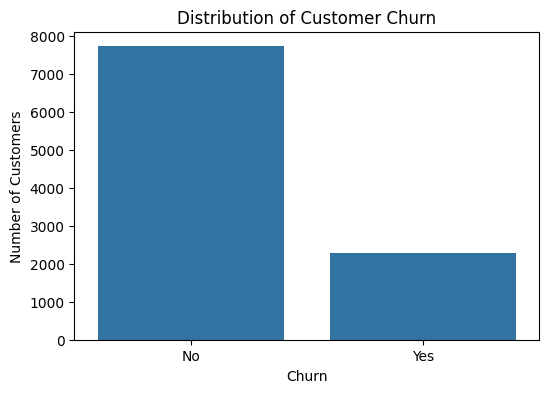

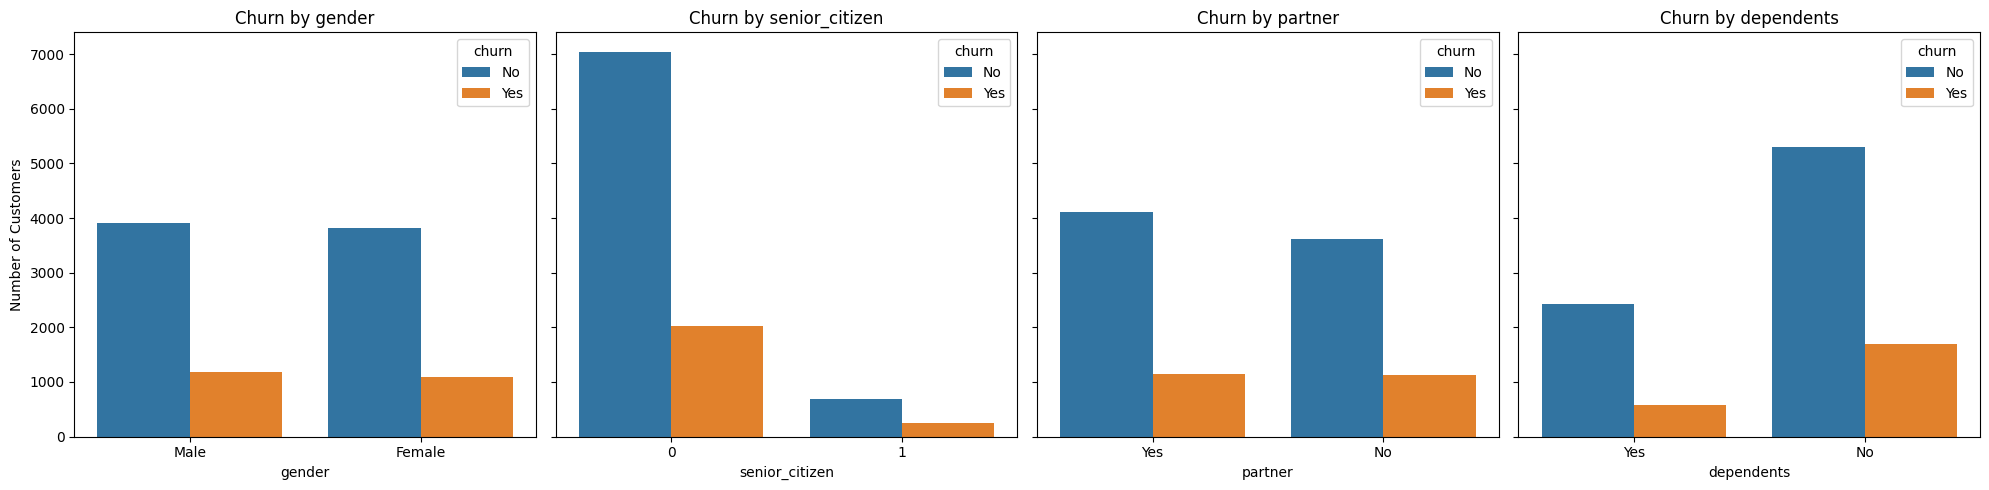

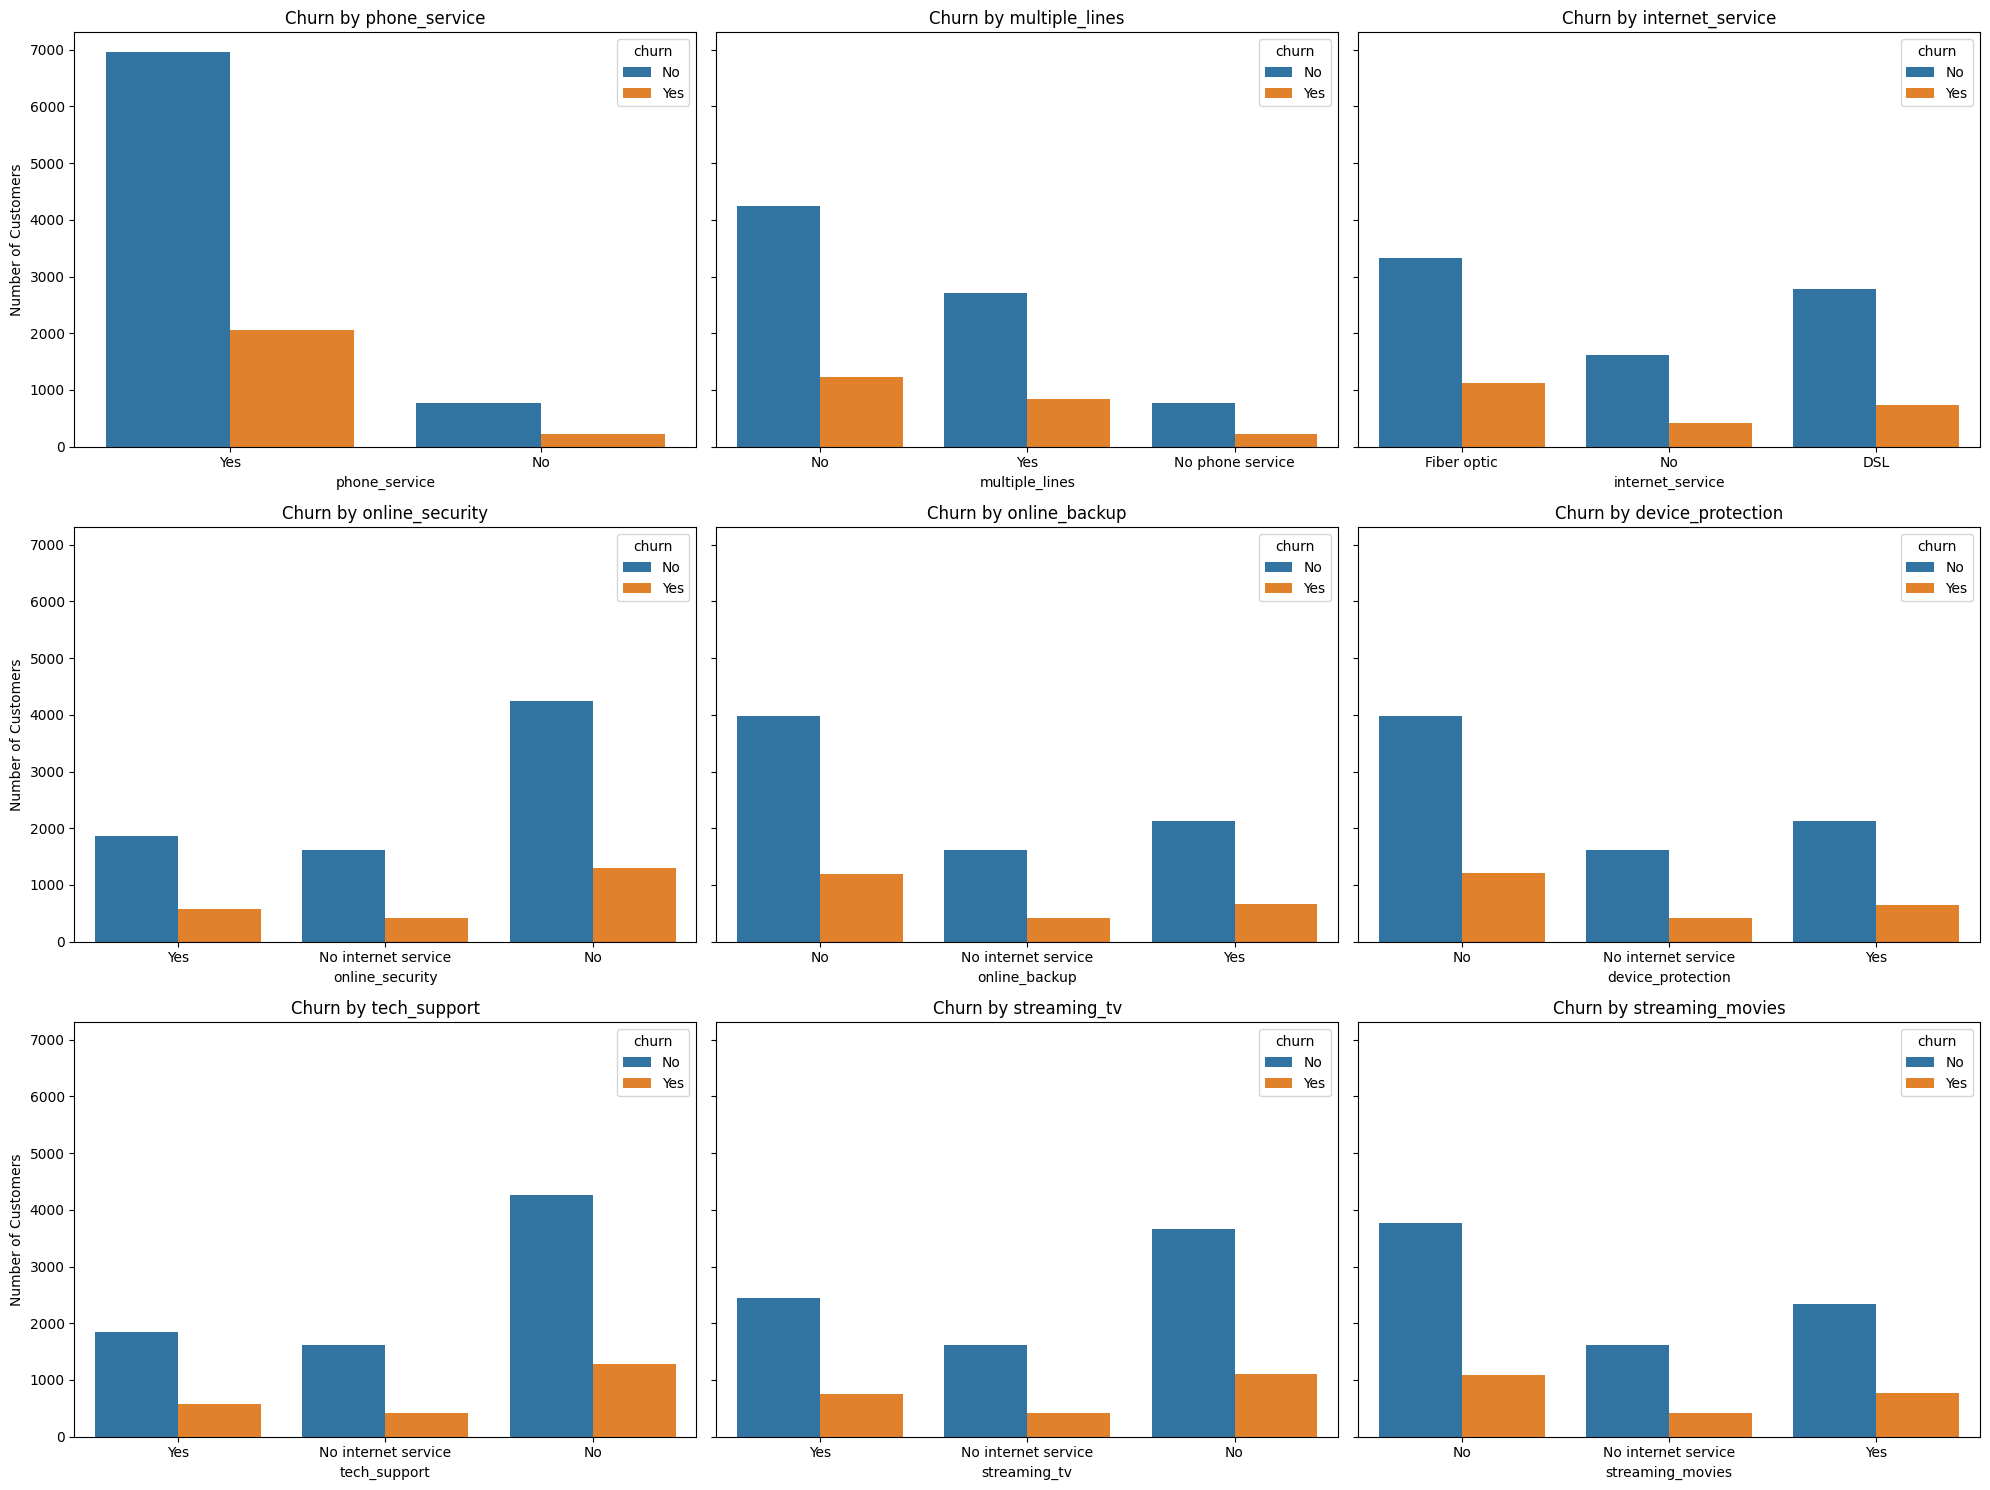

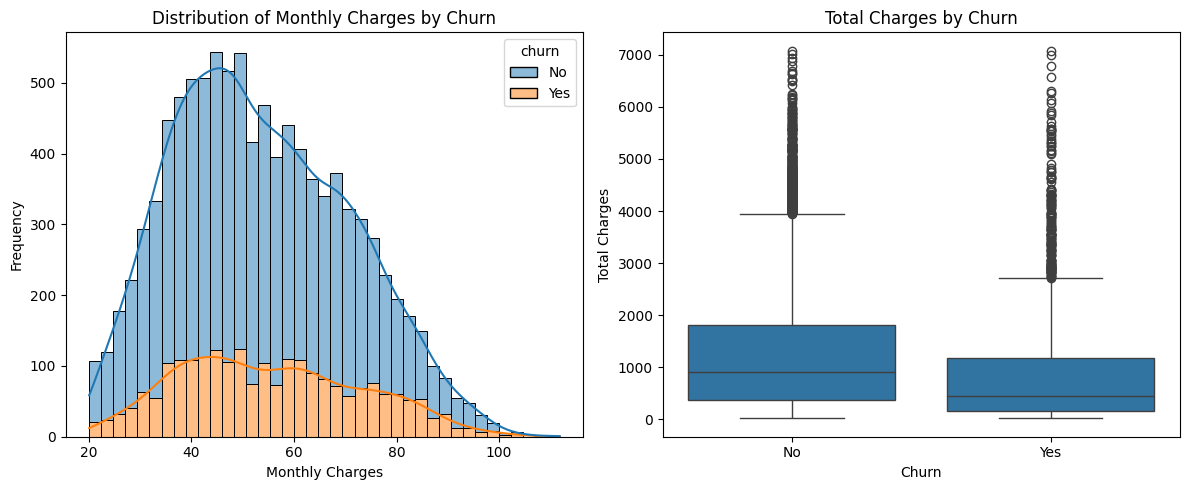

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze the distribution of the 'churn' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

# 2. Explore the relationship between 'churn' and demographic features
demographic_features = ['gender', 'senior_citizen', 'partner', 'dependents']
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
for i, col in enumerate(demographic_features):
    sns.countplot(x=col, hue='churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# 3. Investigate the impact of service features on 'churn'
service_features = ['phone_service', 'multiple_lines', 'internet_service',
                    'online_security', 'online_backup', 'device_protection',
                    'tech_support', 'streaming_tv', 'streaming_movies']
fig, axes = plt.subplots(3, 3, figsize=(20, 15), sharey=True)
axes = axes.flatten()
for i, col in enumerate(service_features):
    sns.countplot(x=col, hue='churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# 4. Analyze the relationship between churn and financial factors
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='monthly_charges', hue='churn', multiple='stack', kde=True)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='churn', y='total_charges')
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.tight_layout()
plt.show()

**Reasoning**:
Compute and visualize the correlation matrix of the numerical features, including the target variable 'churn' after converting it to numerical.



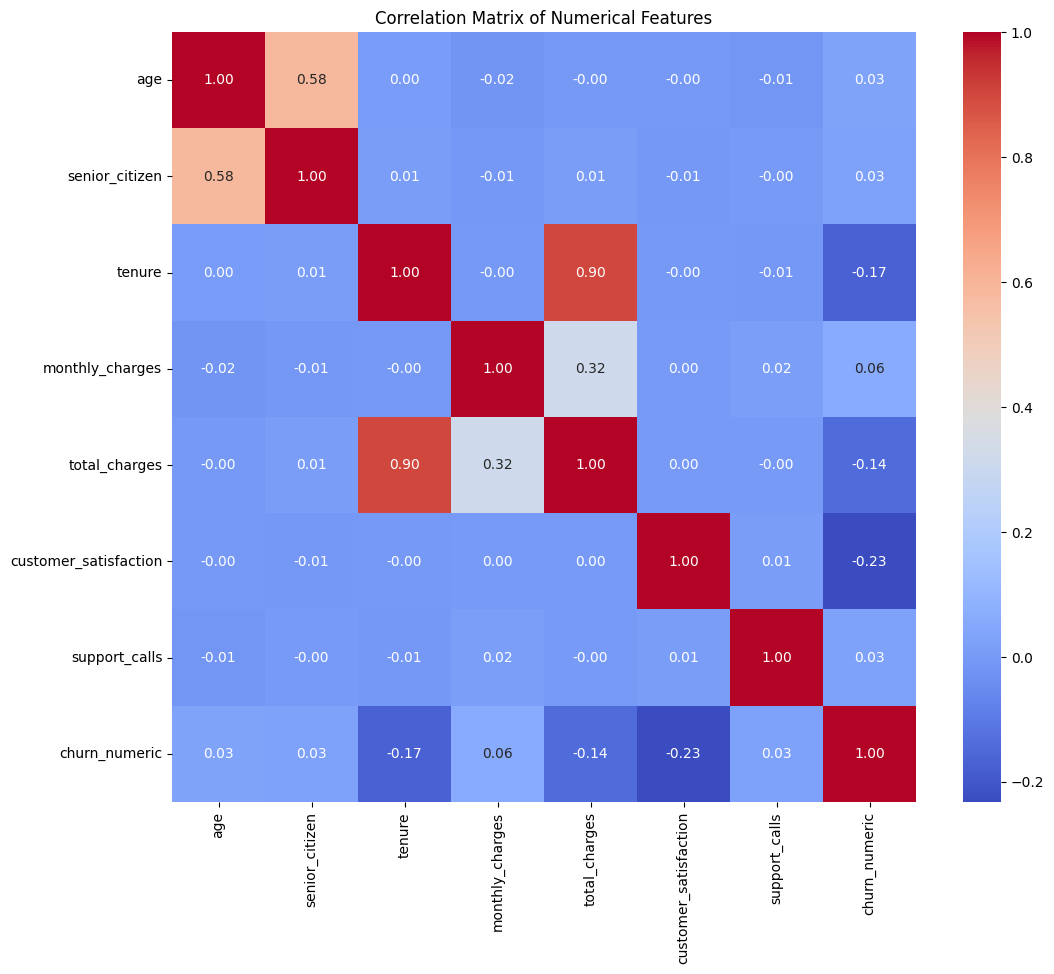

In [4]:
# 5. Compute and visualize the correlation matrix of the numerical features
# Convert 'churn' to numerical representation (0 for No, 1 for Yes)
df['churn_numeric'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Drop the temporary 'churn_numeric' column
df = df.drop('churn_numeric', axis=1)

## Data preprocessing

### Subtask:
Encode categorical variables, scale numerical features, and perform any necessary feature engineering.


**Reasoning**:
Identify categorical and numerical columns, separate features and target, apply one-hot encoding to categorical features, apply standard scaling to numerical features, and concatenate the processed features.



In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
# Remove 'customer_id' and 'churn' from categorical features
categorical_features.remove('customer_id')
categorical_features.remove('churn')

numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Separate target variable
X = df.drop(['customer_id', 'churn'], axis=1)
y = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Convert 'churn' to numerical

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Handle potential unseen categories

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline for preprocessing
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = preprocessing_pipeline.fit_transform(X)

# Convert the processed features back to a DataFrame for easier inspection
# Get the column names after one-hot encoding
onehot_column_names = preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
# Get the numerical column names
numerical_column_names = numerical_features
# Combine numerical and one-hot encoded column names
all_column_names = numerical_column_names + list(onehot_column_names)

X_processed_df = pd.DataFrame(X_processed, columns=all_column_names)

# Display the first few rows of the processed data
print("Processed data (features):")
display(X_processed_df.head())

# Display the shape of the processed data
print("\nShape of processed data:", X_processed_df.shape)

# Display the first few rows of the target variable
print("\nTarget variable (churn):")
display(y.head())

Processed data (features):


,age,senior_citizen,tenure,monthly_charges,total_charges,customer_satisfaction,support_calls,gender_Female,gender_Male,partner_No,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0.509646,-0.318882,-0.762279,-0.848264,-0.751726,0.561854,0.701428,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.184931,-0.318882,0.490085,-0.779043,0.079239,-0.373478,-0.711887,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.648561,-0.318882,-0.511806,1.826135,-0.205257,-1.308809,0.701428,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.551511,3.135959,-0.962658,0.029319,-0.853828,0.561854,2.114743,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.254389,-0.318882,-0.762279,1.063530,-0.607393,-0.373478,0.701428,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0



Shape of processed data: (10000, 48)

Target variable (churn):


,churn
0,0
1,0
2,1
3,0
4,0


## Data splitting

### Subtask:
Split the data into training, validation, and test sets.


**Reasoning**:
Split the preprocessed data and target variable into training, validation, and test sets according to the instructions and print their shapes.



In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X_processed_df, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7000, 48)
Shape of y_train: (7000,)
Shape of X_val: (1500, 48)
Shape of y_val: (1500,)
Shape of X_test: (1500, 48)
Shape of y_test: (1500,)


## Model development

### Subtask:
Implement and train four classification algorithms: Logistic Regression, Decision Tree, Random Forest, and SVM.


**Reasoning**:
Import the necessary classifier classes from sklearn and instantiate each classifier with default parameters.



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Instantiate the classifiers
log_reg = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
svm_clf = SVC()

**Reasoning**:
Train each instantiated model using the training data.



In [8]:
# Train the models
log_reg.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## Hyperparameter tuning

### Subtask:
Tune the hyperparameters of each model using the validation set.


**Reasoning**:
Define parameter grids for each model and use GridSearchCV to find the best hyperparameters on the training data, then evaluate on the validation set.



In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grids
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # 'liblinear' supports both l1 and l2
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Models to tune
models = {
    'Logistic Regression': (log_reg, param_grid_log_reg),
    'Decision Tree': (dt_clf, param_grid_dt),
    'Random Forest': (rf_clf, param_grid_rf),
    'SVM': (svm_clf, param_grid_svm)
}

# Tune and evaluate each model
tuned_models = {}

for name, (model, param_grid) in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    tuned_models[name] = best_model

    # Evaluate on validation set
    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Validation Accuracy for {name}: {val_accuracy:.4f}\n")

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy for Logistic Regression: 0.7787

Tuning Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Validation Accuracy for Decision Tree: 0.7547

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Validation Accuracy for Random Forest: 0.7793

Tuning SVM...
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Validation Accuracy for SVM: 0.7700



## Model evaluation

### Subtask:
Evaluate the performance of each model using appropriate metrics (Accuracy, Precision, Recall, F1-Score) and create confusion matrices.


**Reasoning**:
Import the necessary metrics from sklearn.



In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**Reasoning**:
Iterate through the tuned models, make predictions on the validation set, calculate and print the evaluation metrics, and calculate and visualize the confusion matrix for each model.



Evaluating Logistic Regression...
Accuracy: 0.7787
Precision: 0.6174
Recall: 0.1978
F1-Score: 0.2996
Confusion Matrix:
[[1097   44]
 [ 288   71]]


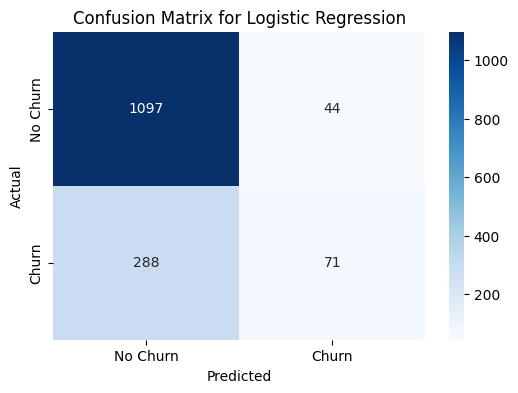

Evaluating Decision Tree...
Accuracy: 0.7547
Precision: 0.4812
Recall: 0.3203
F1-Score: 0.3846
Confusion Matrix:
[[1017  124]
 [ 244  115]]


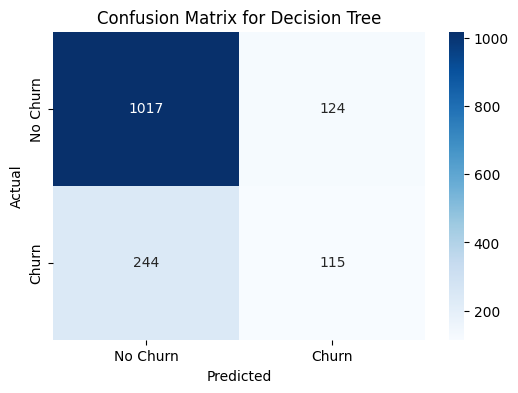

Evaluating Random Forest...
Accuracy: 0.7793
Precision: 0.6556
Recall: 0.1643
F1-Score: 0.2628
Confusion Matrix:
[[1110   31]
 [ 300   59]]


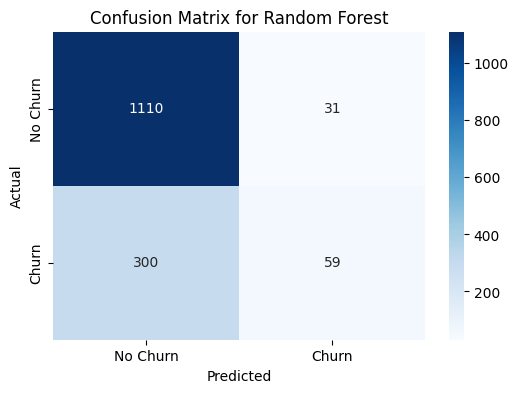

Evaluating SVM...
Accuracy: 0.7700
Precision: 0.5814
Recall: 0.1393
F1-Score: 0.2247
Confusion Matrix:
[[1105   36]
 [ 309   50]]


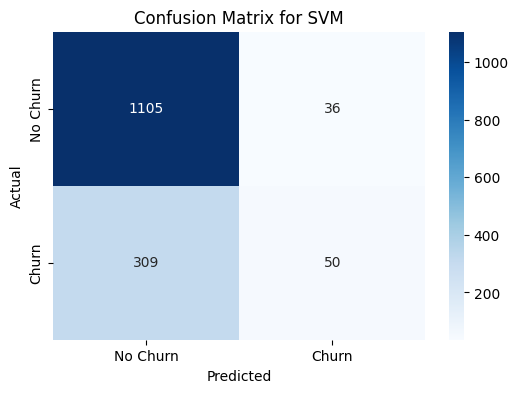


Evaluation metrics for all models:


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.778667,0.617391,0.197772,0.299578
Decision Tree,0.754667,0.481172,0.320334,0.384615
Random Forest,0.779333,0.655556,0.164345,0.262806
SVM,0.770000,0.581395,0.139276,0.224719


In [11]:
evaluation_metrics = {}

for name, model in tuned_models.items():
    print(f"Evaluating {name}...")

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Store metrics
    evaluation_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Calculate and visualize confusion matrix
    cm = confusion_matrix(y_val, y_val_pred)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

print("\nEvaluation metrics for all models:")
display(pd.DataFrame(evaluation_metrics).T)

## Model selection and testing

### Subtask:
Select the best-performing model based on the evaluation metrics and test it on the unseen test set.


**Reasoning**:
Identify the best model based on the F1-Score from the evaluation metrics and then test the best model on the test set by predicting, evaluating, and visualizing the confusion matrix.



The best performing model based on F1-Score is: Decision Tree

Evaluation metrics for Decision Tree on the test set:
Accuracy: 0.7653
Precision: 0.4400
Recall: 0.3416
F1-Score: 0.3846

Confusion Matrix on the test set:
[[1038  140]
 [ 212  110]]


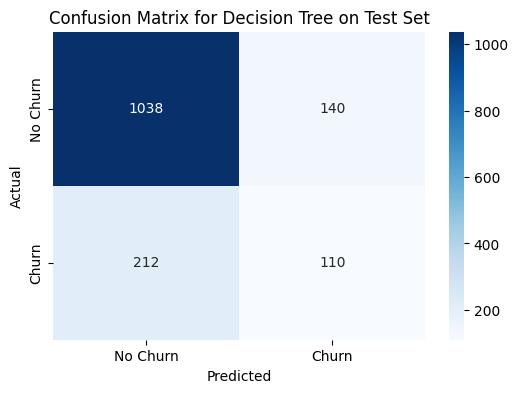

In [12]:
# Find the model with the highest F1-Score
best_model_name = max(evaluation_metrics, key=lambda k: evaluation_metrics[k]['F1-Score'])
best_model = tuned_models[best_model_name]

print(f"The best performing model based on F1-Score is: {best_model_name}")

# Use the best model to make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"\nEvaluation metrics for {best_model_name} on the test set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

# Calculate and visualize the confusion matrix for the test set
test_cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix on the test set:")
print(test_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name} on Test Set')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 10000 entries and 24 columns with no missing values.
*   The dataset includes numerical features (`age`, `senior_citizen`, `tenure`, `monthly_charges`, `total_charges`, `customer_satisfaction`, `support_calls`) and various categorical features.
*   Exploratory Data Analysis revealed that customer churn is influenced by demographic factors (e.g., senior citizens, customers without partners/dependents), service features (e.g., lack of online security or tech support), and financial factors (e.g., higher monthly charges, lower total charges indicating shorter tenure).
*   Numerical features were scaled and categorical features were one-hot encoded, resulting in a processed dataset with 48 features.
*   The data was split into training (7000 samples), validation (1500 samples), and test (1500 samples) sets.
*   Four classification models (Logistic Regression, Decision Tree, Random Forest, and SVM) were trained and their hyperparameters were tuned using the training and validation sets.
*   Based on the F1-Score on the validation set, the Decision Tree model was selected as the best performing model.
*   On the unseen test set, the Decision Tree model achieved an Accuracy of 0.7653, Precision of 0.4400, Recall of 0.3416, and F1-Score of 0.3846.
*   The confusion matrix on the test set for the Decision Tree model showed 1038 True Negatives, 110 True Positives, 140 False Positives, and 212 False Negatives.

### Insights or Next Steps

*   While the Decision Tree model had the highest F1-Score, its recall is relatively low (0.3416), meaning it misses a significant portion of actual churn cases. Further efforts could focus on improving the model's ability to identify churn customers, possibly by addressing class imbalance or exploring different model architectures.
*   Investigate the feature importances from the Decision Tree or Random Forest models to identify the most influential factors driving churn. This information can help in developing targeted customer retention strategies.
